Total transactions: 300
Fraud cases: 41
Non-Fraud-Cases: 259
Accuracy_score: 0.8666666666666667
Classification_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        78
           1       0.00      0.00      0.00        12

    accuracy                           0.87        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.75      0.87      0.80        90



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


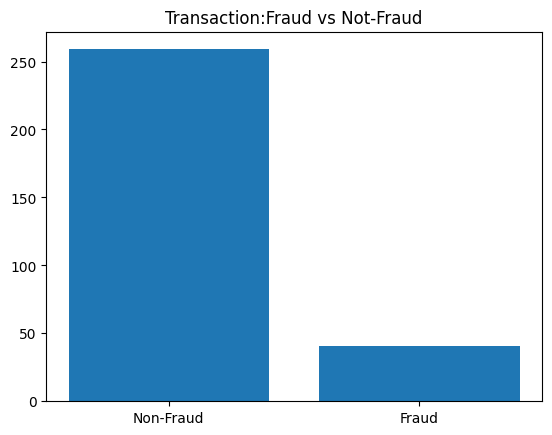

In [6]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

data=pd.read_csv("creditcard_fraud_synth_small.csv")
data = data.drop(["merchant_category"], axis=1)

print("Total transactions:",len(data))
print("Fraud cases:",data['is_fraud'].value_counts()[1])
print("Non-Fraud-Cases:",data['is_fraud'].value_counts()[0])
data=data.dropna(subset=['is_fraud'])
# Drop 'transaction_id' and 'customer_id' columns as they are not numeric and not useful for the model
x=data.drop(['is_fraud', 'transaction_id', 'customer_id'],axis=1)
y=data['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification_report:\n",classification_report(y_test,y_pred))
labels=['Non-Fraud','Fraud']
counts=data['is_fraud'].value_counts()
plt.bar(labels,counts)
plt.title("Transaction:Fraud vs Not-Fraud")
plt.show()